# CSCI 490 - Computer Vision
# BIOMI 813 - Pattern Recognition and Machine Learning
---
## Deep learning: Feature space transformations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Let's us create an ensemble of points $X$ aranged on a regular grid in visual space.

In [2]:
epsilon=1e-12
size = 2.
spacing = 0.2
n = 100

def horiz(h): 
    return np.asarray([np.arange(0., size+epsilon, size/(n-1)), [h]*n]).T
def vert(v): 
    return np.asarray([[v]*n, np.arange(0., size+epsilon, size/(n-1))]).T

X = np.concatenate([horiz(h) for h in np.arange(0., size+epsilon, spacing)]+\
                   [vert(v) for v in np.arange(0., size+epsilon, spacing)], axis=0)

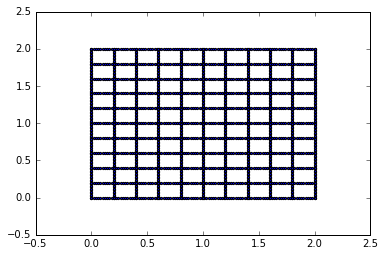

In [3]:
plt.scatter(X[:,0], X[:,1], marker='.')

## What happens if we pass this set of point through a random linear (affine) transformation?

$y=\text{rnm}(x, n)$ is a function that maps $x\in\mathcal{R}^m$ to $y\in\mathcal{R}^n$ by applying an affine transformation such that $y=Wx+b$.

In [4]:
def rlm(x, output_units):
    '''random_linear_mapping'''
    W = np.random.normal(size=(x.shape[1],output_units))
    b = np.random.normal(size=(1,output_units))
    
    return np.dot(x, W)+b

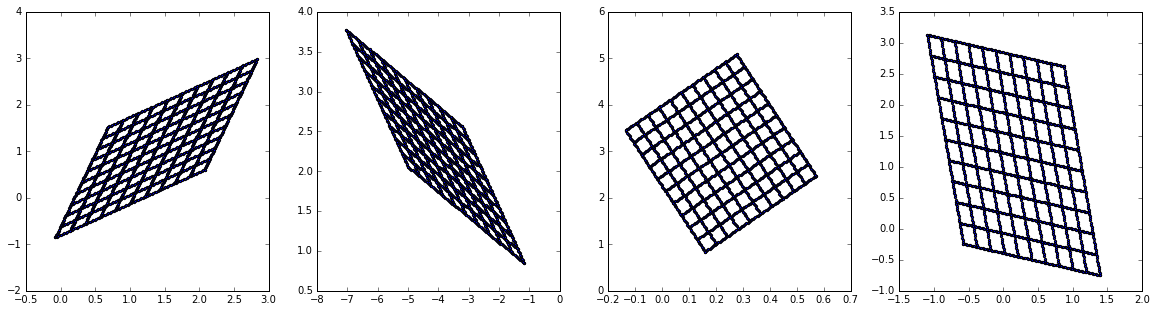

In [5]:
N = 4
plt.figure(figsize=(5*N, 5))
for d in range(N):
    Y = rlm(X, 2)
    plt.subplot(1,N,d+1)
    plt.scatter(Y[:,0], Y[:,1], marker='.')

## Answer:
The grid become tilted and shifted randomly but the proportionality of the distance between points is preserved.

## Let's try a adding a nonlinearity after the matrix multiplication. What do we notice?
The proportionality of the distance between points is no longer preserved.

$y=\text{rnm}(x, n)$ is a function that maps $x\in\mathcal{R}^m$ to $y\in\mathcal{R}^n$ by first applying an affine transformation followed by an element-wise nonlinearity $y=f(Wx+b)$ where $f(\cdot)$ is a sigmoid in this case.

In [6]:
def rnm(x, output_units):
    '''random_nonlinear_mapping'''
    W = np.random.normal(size=(x.shape[1], output_units))
    b = np.random.normal(size=(1,output_units))
    
    return np.tanh(np.dot(x, W)+b)

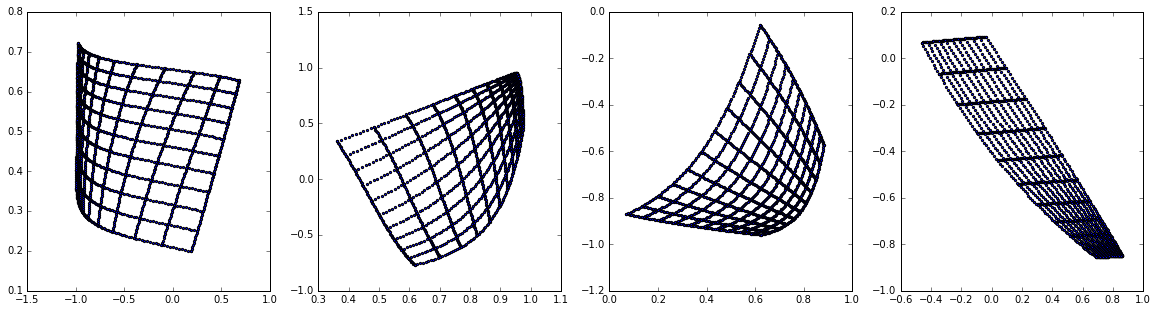

In [7]:
N = 4
plt.figure(figsize=(5*N, 5))
for d in range(N):
    Y = rnm(X,output_units=2)
    plt.subplot(1,N,d+1)
    plt.scatter(Y[:,0], Y[:,1], marker='.')

## Answer:
The proportionality of the distance between points is no longer preserved.

## Let's try adding a hidden layer. Look at the resulting deformations. What do we notice?

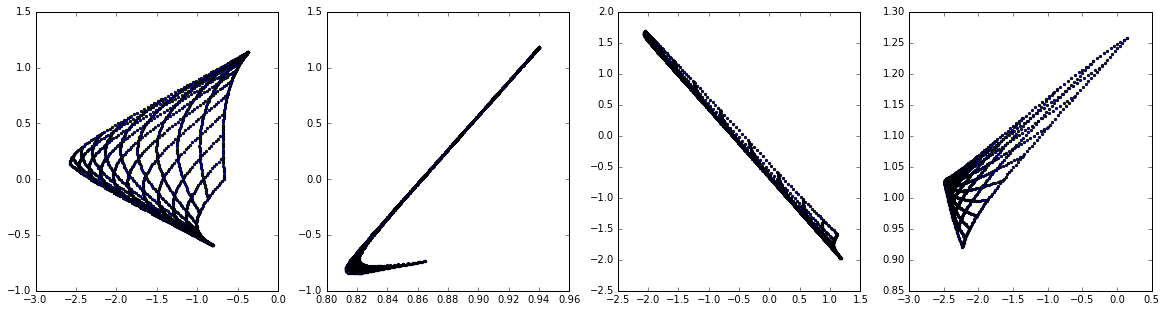

In [8]:
N = 4
plt.figure(figsize=(5*N, 5))
for d in range(N):
    Y = rlm(rnm(X, output_units=2),output_units=2)
    plt.subplot(1,N,d+1)
    plt.scatter(Y[:,0], Y[:,1], marker='.')

## Answer: 
The mapping is no longer simply monotonic! A monotonic function is one that increase (or decrease) steadily along one axis of variation.

## Let's try adding more hidden units. What do we notice?

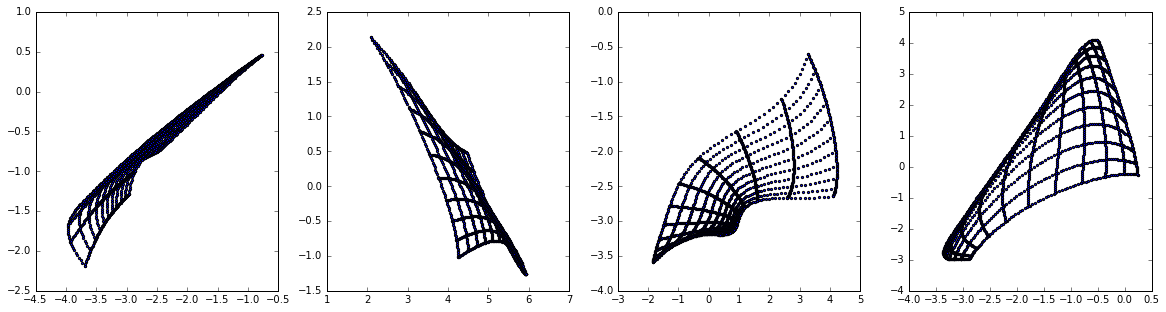

In [9]:
N = 4
plt.figure(figsize=(5*N, 5))
for d in range(N):
    Y = rlm(rnm(X,output_units=10),output_units=2)
    plt.subplot(1,N,d+1)
    plt.scatter(Y[:,0], Y[:,1], marker='.')

## Answer:
We started folding! Folding means that points that were in the same neighbourhood in the input may no longer be in the same neighbourhood in the output

## In fact, we have reached a sufficiently expressive model at this point. 
There is theorem, the "universal approximation theorem",  which states that, given enough hidden units, such a network can approximate any continuous function arbitrarily close. However, the theorem does NOT specify how many units would be required for a given precision, NOR does it tell us how the parameter corresponding to that function can be learned such that it generalizes to point not seen; Only that the model CAN be made expressive enough.

So there is still a big gap between knowing that a family of model exists and having an actual instance from a family of model that perform up to expectations. 

This sort of network composed of layer that consist of an affine transformation followed by a nonlinearity is called a multi-layer perceptron (MLP).

# Exercise:
## 1) Use the previous functions to create a 4-layers network. The first 3 layers shall be random weighted nonlinear layers with output size 4, 6 and 8 respectively, while the final layer shall be a random weighted linear layer with output size 2 and display a few example outputs.

# Extra: The rectifier nonlinearity. 
The rectifier nonlinearity, a piecewise linear function, defined as $f(x) = max(0, x)$ has become popular in recent years due to: 1) being as expressive as other nonlinearity, given sufficient number of hidden units, 2) Is much quicker to evaluate numerically than functions like tanh and sqrt and 3) As shown to result in models that trained faster (in less epoch). This latter property is due to the gradient getting less stuck in region of near-zero gradient since with the  

In [11]:
def rrm(x, output_units):
    '''random_rectified_mapping'''
    W = np.random.normal(size=(x.shape[1], output_units))
    b = np.random.normal(size=(1, output_units))
    rectifier = np.vectorize(lambda x: np.max([0, x]))
    
    return rectifier(np.dot(x, W)+b)